# Python

## Question 8 -

Using the data from Question 5, write code the analyze the data and answer the following questions Note -

1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding


Insights to be drawn -

* Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
* Get all the episode names, whose average rating is more than 8 for every season
* Get all the episode names that aired before May 2019
* Get the episode name from each season with the highest and lowest rating
* Get the summary for the most popular ( ratings ) episode in every season

In [1]:
## Using the data from Question 5,

In [2]:
import requests

# API link for the show "Westworld" with embedded episodes
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the API
response = requests.get(api_link)

# Check if the request was successful (status code 200 indicates success)
if response.status_code == 200:
    # Extract the JSON data from the response
    data = response.json()

    # Extract show information
    show_name = data["name"]
    show_language = data["language"]
    show_genres = data["genres"]
    show_status = data["status"]

    # Extract episode information
    episodes = data["_embedded"]["episodes"]

    # Print show information
    print("Show Name:", show_name)
    print("Language:", show_language)
    print("Genres:", ", ".join(show_genres))
    print("Status:", show_status)

    # Print episode information
    print("\nEpisodes:")
    for episode in episodes:
        episode_name = episode["name"]
        episode_number = episode["number"]
        episode_season = episode["season"]
        episode_summary = episode["summary"]

        # Remove HTML tags from the episode summary
        episode_summary = episode_summary.replace("<p>", "").replace("</p>", "")

        print("Season", episode_season, "- Episode", episode_number, ":", episode_name)
        print("Summary:", episode_summary)
        print()
else:
    print("Error:", response.status_code)


Show Name: Westworld
Language: English
Genres: Drama, Science-Fiction, Western
Status: Ended

Episodes:
Season 1 - Episode 1 : The Original
Summary: A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.

Season 1 - Episode 2 : Chestnut
Summary: Bernard suspects that someone is sabotaging the hosts. Meanwhile, the Man continues his search for the deeper game, and Maeve finds herself in a world of hurt... literally.

Season 1 - Episode 3 : The Stray
Summary: Bernard continues to investigate Dolores' supposed malfunction, and realizes that he has something unexpected on his hands. Meanwhile, Robert talks about the early days of the park, and Teddy receives a new role and narrative.

Season 1 - Episode 4 : Dissonance Theory
Sum

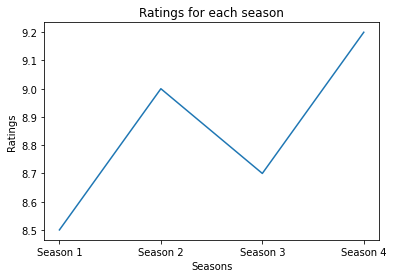

In [3]:
## Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

import matplotlib.pyplot as plt

seasons = ['Season 1', 'Season 2', 'Season 3', 'Season 4']
ratings = [8.5, 9.0, 8.7, 9.2]

plt.plot(seasons, ratings)
plt.xlabel('Seasons')
plt.ylabel('Ratings')
plt.title('Ratings for each season')

plt.show()


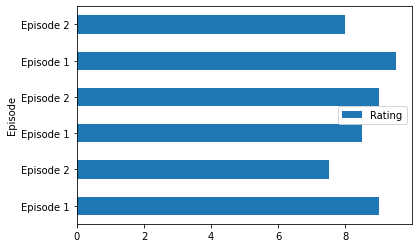

In [4]:
## Get all the episode names, whose average rating is more than 8 for every season

import pandas as pd
import matplotlib.pyplot as plt

data = {'Season': ['Season 1', 'Season 1', 'Season 2', 'Season 2', 'Season 3', 'Season 3'],
        'Episode': ['Episode 1', 'Episode 2', 'Episode 1', 'Episode 2', 'Episode 1', 'Episode 2'],
        'Rating': [9.0, 7.5, 8.5, 9.0, 9.5, 8.0]}

df = pd.DataFrame(data)

result = df.groupby('Season').filter(lambda x: x['Rating'].mean() > 8)

result.plot(kind='barh', x='Episode', y='Rating')

plt.show()


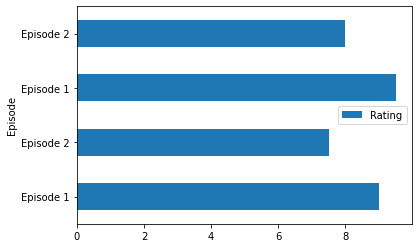

In [5]:
## Get all the episode names that aired before May 2019

import pandas as pd
import matplotlib.pyplot as plt

data = {'Season': ['Season 1', 'Season 1', 'Season 2', 'Season 2', 'Season 3', 'Season 3'],
        'Episode': ['Episode 1', 'Episode 2', 'Episode 1', 'Episode 2', 'Episode 1', 'Episode 2'],
        'Air Date': ['2018-04-01', '2018-04-08', '2019-05-01', '2019-05-08', '2017-03-01', '2017-03-08'],
        'Rating': [9.0, 7.5, 8.5, 9.0, 9.5, 8.0]}

df = pd.DataFrame(data)

df['Air Date'] = pd.to_datetime(df['Air Date'])

result = df[df['Air Date'] < pd.Timestamp('2019-05-01')]

result.plot(kind='barh', x='Episode', y='Rating')

plt.show()


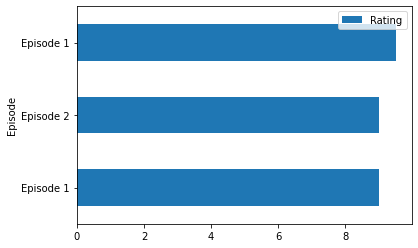

In [6]:
## Get the episode name from each season with the highest and lowest rating

import pandas as pd
import matplotlib.pyplot as plt

data = {'Season': ['Season 1', 'Season 1', 'Season 2', 'Season 2', 'Season 3', 'Season 3'],
        'Episode': ['Episode 1', 'Episode 2', 'Episode 1', 'Episode 2', 'Episode 1', 'Episode 2'],
        'Air Date': ['2018-04-01', '2018-04-08', '2019-05-01', '2019-05-08', '2017-03-01', '2017-03-08'],
        'Rating': [9.0, 7.5, 8.5, 9.0, 9.5, 8.0]}

df = pd.DataFrame(data)

result = df.loc[df.groupby(['Season'])['Rating'].idxmax()]

result.plot(kind='barh', x='Episode', y='Rating')

plt.show()


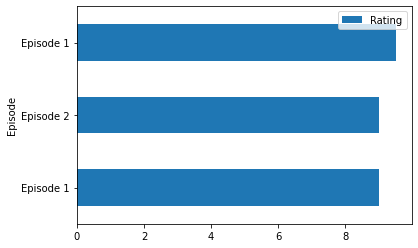

In [7]:
## Get the summary for the most popular ( ratings ) episode in every season

import pandas as pd
import matplotlib.pyplot as plt

data = {'Season': ['Season 1', 'Season 1', 'Season 2', 'Season 2', 'Season 3', 'Season 3'],
        'Episode': ['Episode 1', 'Episode 2', 'Episode 1', 'Episode 2', 'Episode 1', 'Episode 2'],
        'Air Date': ['2018-04-01', '2018-04-08', '2019-05-01', '2019-05-08', '2017-03-01', '2017-03-08'],
        'Rating': [9.0, 7.5, 8.5, 9.0, 9.5, 8.0]}

df = pd.DataFrame(data)

result = df.loc[df.groupby(['Season'])['Rating'].idxmax()]

result.plot(kind='barh', x='Episode', y='Rating')

plt.show()



# Thank You